In [1]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

import torch

from src.dataset import prep_dataloader
from src.model import NeuralNetwork
from src.training import train, test
from src.evaluation import create_loss_label_df, cal_threshold, predict, show_confusion_matrix

In [2]:
# config
# path
tr_path = '../../data/processed/training-set.csv'
val_path = '../../data/processed/validation-set.csv'
tt_path = '../../data/processed/testing-set.csv'
log_path = '../../logs/anomaly_detection'
model_path = '../../models/anomaly_detection/model_weights.pth'

# hyperparameter
batch_size = 64

In [3]:
# get dataloader
all_tr_dl = prep_dataloader(
    tr_path,
    batch_size,
    shuffle=False,
    mode='all'
)

all_val_dl = prep_dataloader(
    val_path,
    batch_size,
    shuffle=False,
    mode='all'
)

all_tt_dl = prep_dataloader(
    tt_path,
    batch_size,
    shuffle=False,
    mode='all'
)

Finished reading the training set (all) of Dataset (164910 samples found, each dim = 196)
Finished reading the validation set (all) of Dataset (41228 samples found, each dim = 196)
Finished reading the testing set (all) of Dataset (51535 samples found, each dim = 196)


In [4]:
# get device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# load model
print(f'Load model weights form {model_path}')
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load(model_path))

Using cuda device
Load model weights form ../../models/anomaly_detection/model_weights.pth


<All keys matched successfully>

In [5]:
tr_df = create_loss_label_df(model, all_tr_dl, device)
val_df = create_loss_label_df(model, all_val_dl, device)
tt_df = create_loss_label_df(model, all_tt_dl, device)

In [6]:
tr_threshold = cal_threshold(tr_df)
print(f'threshold: {tr_threshold}\n')

threshold: 0.0018174974247813225



In [7]:
tr_threshold = 0.00017 # 0.0018

In [8]:
tr_pred = predict(tr_df['loss'].values, tr_threshold)
val_pred = predict(val_df['loss'].values, tr_threshold)
tt_pred = predict(tt_df['loss'].values, tr_threshold)

In [9]:
print('training dataset\n')
print(classification_report(tr_df['label'].values, tr_pred))

print('validation dataset\n')
print(classification_report(val_df['label'].values, val_pred))

print('testing dataset\n')
print(classification_report(tt_df['label'].values, tt_pred))

training dataset

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     59584
           1       0.84      0.85      0.85    105326

    accuracy                           0.80    164910
   macro avg       0.79      0.78      0.79    164910
weighted avg       0.80      0.80      0.80    164910

validation dataset

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     14753
           1       0.84      0.85      0.85     26475

    accuracy                           0.80     41228
   macro avg       0.79      0.78      0.79     41228
weighted avg       0.80      0.80      0.80     41228

testing dataset

              precision    recall  f1-score   support

           0       0.74      0.71      0.73     18663
           1       0.84      0.86      0.85     32872

    accuracy                           0.81     51535
   macro avg       0.79      0.79      0.79     51535
weighted avg       

training dataset



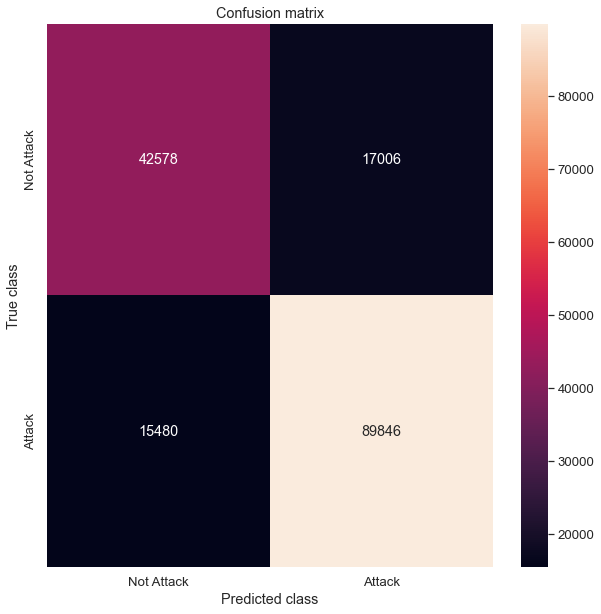

validation dataset



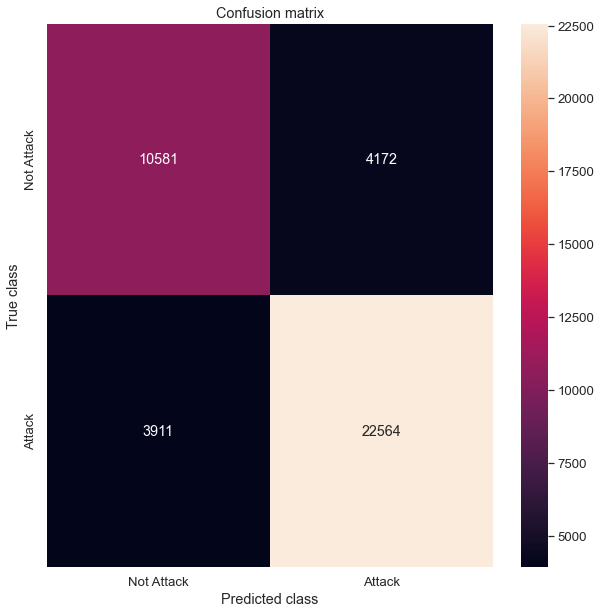

testing dataset



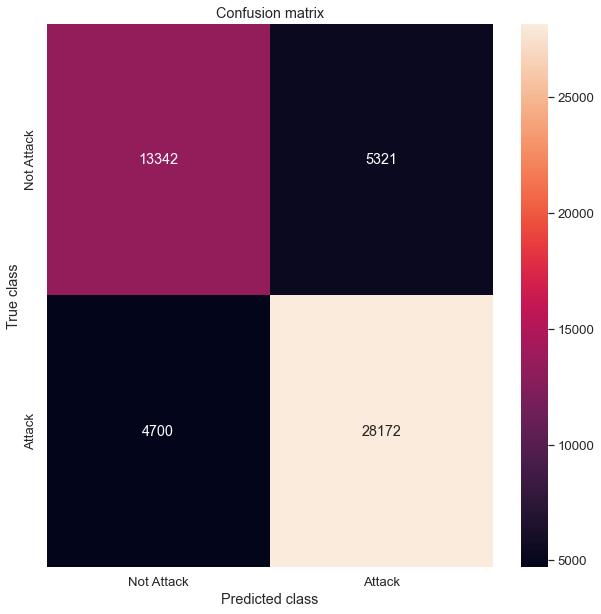

In [10]:
print('training dataset\n')
show_confusion_matrix(tr_df, tr_pred)
print('validation dataset\n')
show_confusion_matrix(val_df, val_pred)
print('testing dataset\n')
show_confusion_matrix(tt_df, tt_pred)